In [0]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 40kB 2.4MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=a02dee83b29a5ccc4fefa768abbe8dc0919e9bf3175f72860cf1bdada5819ead
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=a2b1acf4916a1064ab89135b9ebaa370135a3e303acfe99785e2007e9a06c749
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=e5abb0e6f57aab4f346edf0473cc168b02d0797529ab1b79c00a8eecf0b86e85
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.1MB 2.5MB/s 


In [0]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
#import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [0]:
cd '/content/drive/My Drive/'

/content/drive/My Drive


In [0]:
# Importing dataset
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)
print(reviews_df.shape)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object
(515738, 17)


In [0]:
print(reviews_df.columns.values)

['Hotel_Address' 'Additional_Number_of_Scoring' 'Review_Date'
 'Average_Score' 'Hotel_Name' 'Reviewer_Nationality' 'Negative_Review'
 'Review_Total_Negative_Word_Counts' 'Total_Number_of_Reviews'
 'Positive_Review' 'Review_Total_Positive_Word_Counts'
 'Total_Number_of_Reviews_Reviewer_Has_Given' 'Reviewer_Score' 'Tags'
 'days_since_review' 'lat' 'lng']


In [0]:
df=reviews_df.drop(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
  'Review_Total_Positive_Word_Counts',
 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
 'days_since_review', 'lat', 'lng'], axis=1)

In [0]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [0]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)



In [0]:
print(reviews_text[:10])

[' the hotel staff was extremely helpful and courteous to us it was our first stay in barcelona so we had many questions they didn t let us down ', ' this is a   room hotel but the facilities don t support it restaurant pool etc are all on the small end for a hotel much smaller than this wait in a long queu to go to breakfast sent off to ballroom with makeshit setup because restaurant full staff and mgmt can t keep up with their size with high volume of staff a lot walking around aimlessly and not well trained  staff members pass you and you still can t get a coffee refill one assumes you have a view of the river and big ben but the majority of the rooms face the other direction to buildings and very dark to get any view it is a very costly upgrade to almost the price of the original room not service oriented felt like i was in a factory advertise for families but assumes children sleep on an uncomfortable pullout may work for a toddler but that is about it would never stay here again 

In [0]:
# Preprocessing training data
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Creating datasets
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)


dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [0]:
print(sentiment_df[:10])
print(reviews_text_df[:10])

                                             reviews  labels
0   the hotel staff was extremely helpful and cou...       1
1   this is a   room hotel but the facilities don...       0
2   the staff go above and beyond so lovely i lik...       1
3          perfect situated hotel perfect facilities       1
4                                very friendly staff       0
5                         it s comfort and location        1
6                                showers didn t work       0
7       great breakfast buffet location is excellent       1
8   location is a little out it s ideal for londo...       0
9                               good high spec hotel       1
                                        reviews_text
0   the hotel staff was extremely helpful and cou...
1   this is a   room hotel but the facilities don...
2   the staff go above and beyond so lovely i lik...
3          perfect situated hotel perfect facilities
4                                very friendly staff
5          

In [0]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [0]:
reviews = []
sentences = list(sentiment_df['reviews'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [0]:
print(sentiment_df[:10])
print(reviews_text_df[:10])

                                             reviews  labels
0   the hotel staff was extremely helpful and cou...       1
1   this is a   room hotel but the facilities don...       0
2   the staff go above and beyond so lovely i lik...       1
3          perfect situated hotel perfect facilities       1
4                                very friendly staff       0
5                         it s comfort and location        1
6                                showers didn t work       0
7       great breakfast buffet location is excellent       1
8   location is a little out it s ideal for londo...       0
9                               good high spec hotel       1
                                        reviews_text
0   the hotel staff was extremely helpful and cou...
1   this is a   room hotel but the facilities don...
2   the staff go above and beyond so lovely i lik...
3          perfect situated hotel perfect facilities
4                                very friendly staff
5          

In [0]:
print(sentiment_df.columns.values)

['reviews' 'labels']


In [0]:
reviews = []
sentences = list(sentiment_df['reviews'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

In [0]:
sentiment_df.labels.unique()

array([1, 0])

In [0]:
print(reviews[20])

 toalettermas spolnings system under all kritik london 


In [0]:
y = sentiment_df['labels']


In [0]:
print(y[3])


1


In [0]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [0]:
tokenizer.tokenize("don't be so judgmental")

['don', "'", 't', 'be', 'so', 'judgment', '##al']

In [0]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[2123, 2102, 2022, 2061, 8689, 2389]

In [0]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(reviews[10]))

[2043,
 2057,
 2288,
 2000,
 3309,
 2027,
 2699,
 13003,
 2005,
 4469,
 2793,
 2057,
 3825,
 2021,
 2043,
 2057,
 17414,
 2009,
 2001,
 2005,
 1997,
 2149,
 2027,
 2056,
 2057,
 2481,
 2131,
 4469,
 2793,
 1999,
 1996,
 2282]

In [0]:
def tokenize_reviews(reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(reviews))

In [0]:
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

In [0]:
print(tokenized_reviews[11])

[2035, 2003, 3819]


In [0]:
reviews_with_len = [[review, y[i], len(labels)]
                 for i, review in enumerate(tokenized_reviews)]

In [0]:
import random
random.shuffle(reviews_with_len)

In [0]:
print(reviews_with_len[:10])

[[[2488, 3737, 5572, 8641, 1999, 1996, 2282, 1998, 2012, 6350], 0, 16826], [[9344, 3203, 28947, 2008, 2016, 2323, 2025, 4550, 1996, 2282, 5723, 7752, 2001, 18856, 8649, 5999, 1998, 11055, 5186, 3254, 6350, 2205, 6450], 0, 16826], [[2008, 2045, 2020, 6963, 1998, 4825, 2330, 1999, 1996, 3309, 2043, 2057, 2513, 2013, 2256, 2305, 2041], 1, 16826], [[2200, 2485, 2000, 17775, 3871, 1998, 10237, 4796, 5230, 2644, 2116, 23812, 2105, 3819, 3295, 2005, 2033, 1998, 2026, 2767], 1, 16826], [[1996, 3465, 1997, 6350, 2001, 2978, 2152], 0, 16826], [[2000, 2022, 7481, 2057, 3866, 2023, 11366, 2057, 6158, 2004, 2155, 1997, 12954, 3611, 2095, 2214, 2365, 1998, 2095, 2214, 2684, 1998, 2057, 2018, 2000, 28890, 19796, 2029, 2001, 11113, 4183, 1997, 9467], 0, 16826], [[2052, 1997, 2042, 6581, 2018, 2057, 2042, 7420, 2055, 1996, 2147, 2183, 2006], 0, 16826], [[1996, 3095, 2020, 5379, 2021, 2790, 2000, 2031, 7199, 3132, 2394, 1998, 1996, 3199, 10382, 17099, 2006, 21725, 4012, 2003, 2025, 10382, 2012, 2035, 20

In [0]:
reviews_with_len.sort(key=lambda x: x[2])

In [0]:
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]

In [0]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))

In [0]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))

In [0]:
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 193), dtype=int32, numpy=
 array([[ 2488,  3737,  5572, ...,     0,     0,     0],
        [ 9344,  3203, 28947, ...,     0,     0,     0],
        [ 2008,  2045,  2020, ...,     0,     0,     0],
        ...,
        [ 2053, 17612,     0, ...,     0,     0,     0],
        [ 2228,  2027,  2024, ...,     0,     0,     0],
        [ 6574, 22123, 12053, ...,     0,     0,     0]], dtype=int32)>,
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)>)

In [0]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [0]:
class TEXT_MODEL(tf.keras.Model):
    
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=True,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = layers.GlobalMaxPool1D()
        
        self.dense_1 = layers.Dense(units=dnn_units, activation="relu")
        self.dropout = layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3) 
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) # (batch_size, 3 * cnn_filters)
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        
        return model_output

In [0]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2

DROPOUT_RATE = 0.2

NB_EPOCHS = 5

In [0]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [0]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

In [0]:

text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
474/474 [==============================] - 72s 153ms/step - loss: 0.2384 - accuracy: 0.9046
Epoch 2/5
474/474 [==============================] - 74s 155ms/step - loss: 0.1188 - accuracy: 0.9591
Epoch 3/5
474/474 [==============================] - 72s 152ms/step - loss: 0.0700 - accuracy: 0.9767
Epoch 4/5
474/474 [==============================] - 72s 153ms/step - loss: 0.0500 - accuracy: 0.9827
Epoch 5/5
474/474 [==============================] - 72s 152ms/step - loss: 0.0487 - accuracy: 0.9825


In [0]:
loss, accuracy = text_model.evaluate(test_data)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

52/52 [==============================] - 2s 29ms/step - loss: 0.3551 - accuracy: 0.9195
Test Loss: 0.35505378246307373
Test Accuracy: 0.9194711446762085


In [0]:
y_pred = tf.nn.softmax(text_model.predict(test_data))

In [0]:
y_pred_argmax = tf.math.argmax(y_pred, axis=1)

In [0]:
y_true = tf.Variable([], dtype=tf.int32)

for labels, labels in test_data.take(-1):
    y_true = tf.concat([y_true, labels], 0)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.47      0.64      1664
           1       0.00      0.00      0.00         0

    accuracy                           0.47      1664
   macro avg       0.50      0.23      0.32      1664
weighted avg       1.00      0.47      0.64      1664



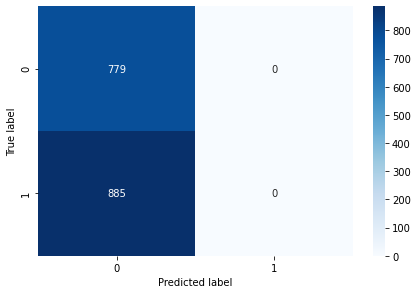

In [93]:
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

def visualize_confusion_matrix(y_pred_argmax, y_true):
    """

    :param y_pred_arg: This is an array with values that are 0 or 1
    :param y_true: This is an array with values that are 0 or 1
    :return:
    """

    cm = tf.math.confusion_matrix(y_true, y_pred_argmax).numpy()
    con_mat_df = pd.DataFrame(cm)
    
    print(classification_report(y_pred_argmax, y_true))

    sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

#print(classification_report(test_labels, baseline_predicted))
visualize_confusion_matrix(y_pred_argmax, y_true)

In [0]:
loss, accuracy = text_model.evaluate(test_data)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

52/52 [==============================] - 2s 30ms/step - loss: 0.3551 - accuracy: 0.9195
Test Loss: 0.35505378246307373
Test Accuracy: 0.9194711446762085
